# **AP155 Lab Assignment** 
## Module 4: Fourier Transforms

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Problems 1 to 3 are worth 20, 30, and 50 points, respectively).

_Due Date_: **5PM of November 23 (Tue)**


### Student Information 

_Full Name (Last Name, First Name)_: Hans Emmanuel Hernandez \
_Student No._: 2020-11387 \
_Section_: THU-HX-4

### Submission Information

_Date and Time Submitted (most recent upload)_: November 28, 2022 

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**HANS EMMANUEL HERNANDEZ** 

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/20
* Problem 2 - []/30
* Problem 3 - []/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

### PROBLEM 1 (20 pts.; 50/50 for code & discussion) 
**Fourier transform of a simple function**

1. Calculate the coefficients in the discrete Fourier transforms of the modulated sine wave $y_n = \sin(\pi n/N) sin(20\pi n/N)$ sampled at $N = 1000$ evenly spaced points using your own user-defined function. *(10 pts.)*

2. Make a plot of their amplitudes similar to the plot shown in Fig. 7.4 of the Newman text. *(10 pts.)*


In [ ]:
import numpy as np
from numpy import sin, pi, arange, linspace, zeros, exp, log, shape
from numpy.fft import rfft, irfft, rfft2, irfft2
import pandas as pd
import matplotlib.pyplot as plt

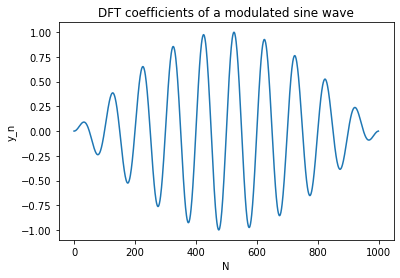

In [ ]:
# Define variables
N = 1000                                       # sample points
n = arange(N)                                  # initialize n         
Y = sin(pi*n/N)*sin(20*pi*n/N)                 # modulated sine wave equation

# Define dft function
def dft(y):
	c = zeros(N//2 +1,complex)                   # initialize a complex array for the coefficients
	for k in range(N//2 + 1):                    # loop through the elements in c
		c[k] = sum(y*exp(-2j*pi*k*n/N))            # formula of DFT is applied onto every element
	
	return c                                     # returns array of DFT coefficients
                                               # returns N/2 + 1 when N is even, returns (N+1)/2 when N is odd
# Plot
fig, ax = plt.subplots()
ax.plot(Y)
ax.set(xlabel='N', ylabel='y_n', title='DFT coefficients of a modulated sine wave')
plt.show()

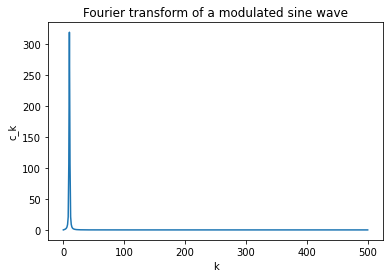

In [ ]:
# Call the user-defined dft function from the previous cell and apply to the given modulated sine wave equation
d = dft(Y)                             

# Plot
fig, ax = plt.subplots()                   
ax.plot(abs(d))                         # discard imaginary part for plotting
ax.set(xlabel='k', ylabel='c_k', title='Fourier transform of a modulated sine wave')
plt.show()

### PROBLEM 2 (30 pts.; 50/50 for code & discussion)

**Fourier filtering**

For this problem, you will use data from a text file called $\tt dow.txt$. It contains the daily closing value for each business day from late 2006 until the end of 2010 of the Dow Jones Industrial Average, which is a measure of average prices on the US stock market.

First, you need to make a copy of the file $\tt dow.txt$ and save it to a folder in your **own Google Drive**. This file is available from the AP155 Course Pack Google Drive (in the General > Datasets folder) and directly from this link: https://drive.google.com/file/d/1CHXGF2s9HvKJPTVRWeq5tJpgFxYuOgOg/view?usp=sharing

The code cells below will (1) mount Google Drive and (2) load the data from your Google Drive. Follow the instructions below to load the data. Then, do the following:

1. Plot the data on a graph. *(5 pts.)*

2. Calculate the coefficients of the discrete Fourier transform of the data using the function $\tt rfft$ from numpy's $\tt fft$ library, which produces an array of $\frac{1}{2}N +1$ complex numbers. *(10 pts.)*

3. Now set all but the first 10% of the elements of this array to zero (i.e., set the last 90% to zero but keep the values of the first 10%). *(5 pts.)* 

4. Calculate the inverse Fourier transform of the resulting array, zeros and all, using the function $\tt irfft$, and plot it on the same graph as the original data. You may need to vary the colors of the two curves to make sure they both show up on the graph. Comment on what you see. What is happening when you set the Fourier coefficients to zero? *(10 pts.)*

Mount the Google Drive where you saved the file $\tt dow.txt$. 

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Define the directory path to the location of the file $\tt dow.txt$, i.e. if it is in a folder named "AP155" under My Drive, then the file path will be "/content/drive/My Drive/AP155". Change the string variable in the code cell below, as needed:

In [ ]:
file_path = "/content/drive/My Drive/AP155/"

Use numpy's $\tt loadtxt$ function ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)) to load the $\tt dow.txt$ file and save the data into a numpy array named $\tt dow$.

In [ ]:
# Assign data as an array into a variable
dow = np.loadtxt(file_path+"dow.txt")

Now you can start to write code for this problem!

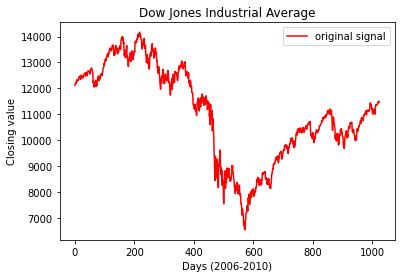

In [ ]:
# Plot the unfiltered signal
plt.title("Dow Jones Industrial Average")
plt.xlabel("Days (2006-2010)")
plt.ylabel("Closing value")
plt.plot(dow, 'r', label = "original signal",)
plt.legend()

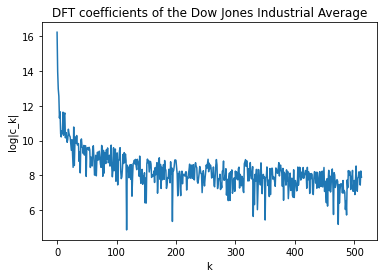


Data entries: (1024,) DFT coefficient entries: (513,)


In [ ]:
# Calculate the coefficients of the dft of the data
coeff = rfft(dow)

# Plot
fig, ax = plt.subplots()
ax.plot(range(len(coeff)), log(abs(coeff)))                    # x axis: k-entries, y-axis: real part of coefficient values
ax.set(xlabel='k', ylabel='log|c_k|', title='DFT coefficients of the Dow Jones Industrial Average')
plt.show()

print("\nData entries:", shape(dow), "DFT coefficient entries:", shape(coeff))

**We can see that the array of DFT coefficients indeed follow (N/2) + 1 for its elements.** 

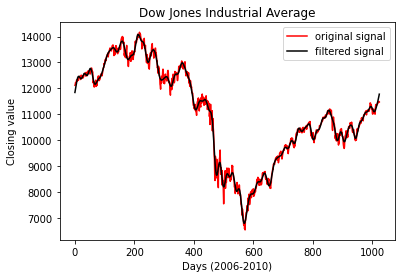

In [ ]:
# All elements except for the first 10% of the data are set to 0
dow_ten = int(len(coeff) / 10)                        # divide the length of the coeff array by 10
                                                      # converting to int rounds down the output
for i in range(dow_ten + 1, len(coeff), 1):           # replace the elements of the coeff array with 0 starting from its 52nd element (dow_ten + 1) until its last element with step = 1
  coeff[i] = 0                                        
    
# Calculate the inverse Fourier transform of the resulting array 
Z = irfft(coeff)

# Plot
plt.title("Dow Jones Industrial Average")
plt.xlabel("Days (2006-2010)")
plt.ylabel("Closing value")
plt.plot(dow, 'r', label = "original signal",)
plt.plot(Z, 'k',  label = "filtered signal")
plt.legend()


**As we can see from the plot above, the filtered signal matches the original signal but is evidently smoother the former. This is due to the few Fourier coefficients that were set to zero, effectively smoothing the function which as we can see, is closer to the purer sine wave. However, this process obviously reduces the accuracy of the signal.**

### PROBLEM 3 (50 pts.; 50/50 for code & discussion)

**Real-world Application: Image deconvolution**

_Refer to Exercise 7.9 of the Newman text_ For this problem, you will use data from a text file called $\tt blur.txt$. It contains a grid of values representing brightness on a black-and-white photo-- a badly out-of-focus one that has been deliberately blurred using a Gaussian point spread function of width $\sigma = 25$. 

Similar to what you did for Problem 2, you need to make a copy of the file $\tt blur.txt$ and save it to the same folder in your **own Google Drive** where you saved $\tt dow.txt$. This file is available from the AP155 Course Pack Google Drive (in the General > Datasets folder) and directly from this link: https://drive.google.com/file/d/1CHXGF2s9HvKJPTVRWeq5tJpgFxYuOgOg/view?usp=sharing

1. Use numpy's $\tt loadtxt$ to load the grid of values into a two-dimensional array of real numbers, e.g.:
```
blur = np.loadtxt(file_path+"blur.txt")
``` 
Plot the values on the screen of the computer as a density plot. (Hint: Use $\tt imshow$ and $\tt show$ from the pylab package.) You should see the photo appear. If you get something wrong it might be upside-down. Work with the details of your program until you get it appearing correctly. (Hint: The picture has the sky, which is bright, at the top and the ground, which is dark, at the bottom.) *(10 pts.)*

2. Create an array of the point spread function (PSF), of the same size as the photo, based on the Gaussian function $f(x,y) = exp\left(-\frac{x^2+y^2}{2\sigma^2}\right)$. In particular, get the sum of 4 Gaussians with $\sigma = 25$ centered on each of the four corners of the image. _Refer to the figure on page 325 of the Newman text._ *(10 pts.)*

3. Make a density plot of these values on the screen, so that you get a visualization of your point spread function. *(10 pts.)*

3. Apply Fourier transforms using the functions $\tt rfft2$ and $\tt irfft2$ from numpy's $\tt fft$ package to perform image deconvolution as follows:

* Get Fourier transforms of both the blurred image and the PSF from (1) and (2) 
* Divide one by the other
* Perform an inverse transform to get the unblurred photo
* Display the unblurred photo on the screen

When you are done, you should be able to make out the scene in the photo, although probably it will still not be perfectly sharp. *(20 pts.)*

   Hint: One thing you'll need to deal with is what happens when the Fourier transform of the point spread function is zero, or close to zero. In that case if you divide by it you'll get an error (because you can't divide by zero) or just a very
large number (because you're dividing by something small). A workable compromise is that if a value in the Fourier transform of the point spread function is smaller than a certain amount $\epsilon$ you don't divide by it-- just leave that coefficient alone. The value of $\epsilon$ is not very critical but a reasonable value seems to be $10^{-3}$. 

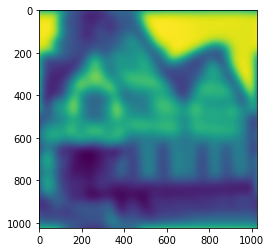

In [ ]:
# Assign data as an array into a variable 
blur = np.loadtxt(file_path+"blur.txt")

# Show blurred image
plt.imshow(blur)

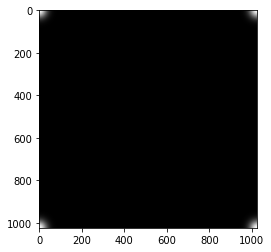

In [ ]:
# Define variables
sigma = 25                       # Gaussian width
dim = len(blur)                  # after checking that the data is a 1024 x 1024 array,
                                 # assign the length to a variable which represents the x and y dimensions of the image

# Define the given point spread function
def f(x, y):
  top_left = exp(-(x**2 + y**2) / (2*sigma**2))                   # reference point (origin)
  top_right = exp(-((x-dim)**2 + y**2) / (2*sigma**2))            # move to the right of reference point
  bot_left = exp(-(x**2 + (y-dim)**2) / (2*sigma**2))             # move to the bottom of reference point
  bot_right = exp(-((x-dim)**2 + (y-dim)**2) / (2*sigma**2))      # move to the right of reference point then move to the bottom
  return top_left + top_right + bot_left + bot_right              # returns sum of the four gaussians

point_spread_array = np.zeros(shape(blur))                        # initialize an array of zeros for the point spread function

# Start of assignment loop
for i in range(0, dim, 1):                      # goes through all elements of dim
  for j in range(0, dim, 1):                    # goes through all elements of dim
    point_spread_array[i, j] = f(i, j)          # calls for point spread function to solve for specified index values and then
                                                # assigns them back to the initialized array

# Show the density plot of the values
plt.imshow(point_spread_array, cmap='gray')

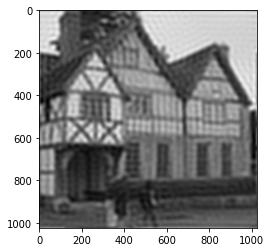

In [ ]:
# Get the fourier transform of both using rfft2
blurred_fourier = rfft2(blur)
point_spread_fourier = rfft2(point_spread_array)

# Initialize an array of zeros for the fourier of the unblurred image with matching dimensions and dtype of those above
unblurred_fourier = np.zeros([dim, dim // 2 + 1], complex)

# Assign desired accuracy
epsilon = 1e-3 

# Start of loop
for i in range(0, dim, 1):                                    # goes through all 1024 elements of dim
  for j in range(0, (dim // 2) + 1, 1):                       # goes through 513 elements of dim since dim is even (N/2 + 1)
    if abs(point_spread_fourier[i, j]) < epsilon:             # if the fourier absolute value of the point spread function is smaller than epsilon, 
      unblurred_fourier[i, j] = blurred_fourier[i, j]         # leave the coefficient as is (assigns value of blurred_fourier to unblurred_fourier with matching indices)
    else: 
      unblurred_fourier[i, j] = blurred_fourier[i, j] / point_spread_fourier[i, j]    # divide fourier of blurred image by fourier of point spread function if the value is larger than epsilon

# Show image of inversed, unblurred fourier array
plt.imshow(irfft2(unblurred_fourier), cmap = 'gray')